In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [6]:
input_size=2
layers=[10]
output_size=2

In [7]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        
        np.random.seed(0)
        
        model={}
        
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.random.randn(1,layers[0])
        
        model['W2']=np.random.randn(layers[0],output_size)
        model['b2']=np.random.randn(1,output_size)
        
        self.model=model
        
    def forward(self,x):
        
        W1,W2=self.model['W1'],self.model['W2']
        b1,b2=self.model['b1'],self.model['b2']
        
        z1=np.dot(X,W1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        y_=a2
        
        self.activation_outputs=a1,y_
        
        return y_
    
    
    def backward(self,X,Y,learning_rate):
              
        
        W1,W2=self.model['W1'],self.model['W2']
        b1,b2=self.model['b1'],self.model['b2']
        
        m=X.shape[0]
        
        a1,y_=self.activation_outputs
        
        delta2=y_- Y
        
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1)/float(m)
        
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
    def predict(self,X):
        y_out=self.forward
        
        return np.argmax(y_out,axis=0)
    
    def summary(self):
        
        W1,W2,b1,b2= self.model['W1'],self.model['W2'],self.model['b1'],self.model['b2']
        a1,y_=self.activation_outputs
        
        print("W1",W1)
        print("W2",W2)
        print("b1",b1)
        print("b2",b2)
        print("a1",a1)
        print("y_",y_)
        
        
    
    
        

In [8]:
def softmax(a):
    e_pa=np.exp(a)
    
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    
    return ans

In [9]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    
    return l

In [10]:
def one_hot(y,depth):
    
    m=y.shape[0]  #rows of matrix= no. of examples
    y_oht=np.zeros((m,depth))
    
    y_oht[np.arange(m),y]=1
    
    return y_oht
    

In [11]:
###Generating Data

from sklearn.datasets import make_circles

import matplotlib.pyplot as plt

In [12]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

<function matplotlib.pyplot.show(*args, **kw)>

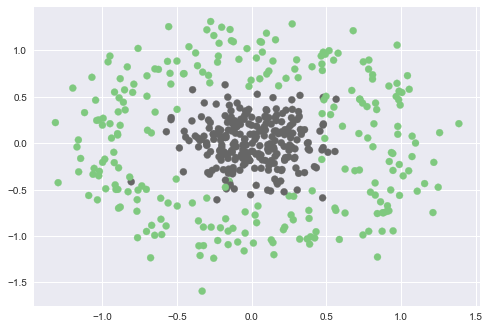

In [13]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show

In [14]:
#Training our model

model=NeuralNetwork(input_size=2,layers=[10],output_size=2)


In [15]:
model.forward(X)

array([[-0.99994732,  0.83433788],
       [-0.999777  ,  0.5590115 ],
       [-0.99988915,  0.98262264],
       [-0.99998938,  0.06267873],
       [-0.99763593,  0.65803138],
       [-0.99992693,  0.73536092],
       [-0.99994286, -0.07156164],
       [-0.99975403,  0.9948546 ],
       [-0.9965817 ,  0.99638961],
       [-0.9999859 , -0.40228967],
       [-0.99994867,  0.72075884],
       [-0.96676467, -0.12947735],
       [-0.99993737, -0.74367052],
       [-0.99998786,  0.61004185],
       [-0.99994581,  0.7914813 ],
       [-0.89703581,  0.15689785],
       [-0.99984222,  0.01457607],
       [-0.99929349,  0.02557406],
       [-0.96849153, -0.69420912],
       [-0.98759596, -0.75779756],
       [-0.99989634,  0.54916534],
       [-0.99984203,  0.89450473],
       [-0.99927688, -0.30181256],
       [-0.99837927,  0.33800103],
       [-0.99998578,  0.72288709],
       [-0.99935187, -0.39978605],
       [-0.99976672,  0.9924982 ],
       [-0.99964514, -0.62131256],
       [-0.94569851,

In [16]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [17]:
losses = train(X,Y,model,500,0.001)


c:\users\mridul gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Epoch 0 Loss nan
Epoch 1 Loss nan
Epoch 2 Loss nan
Epoch 3 Loss nan
Epoch 4 Loss nan
Epoch 5 Loss nan
Epoch 6 Loss nan
Epoch 7 Loss nan
Epoch 8 Loss 0.3840
Epoch 9 Loss 0.3798
Epoch 10 Loss 0.3612
Epoch 11 Loss 0.3569
Epoch 12 Loss 0.3437
Epoch 13 Loss 0.3385
Epoch 14 Loss 0.3279
Epoch 15 Loss 0.3220
Epoch 16 Loss 0.3129
Epoch 17 Loss 0.3067
Epoch 18 Loss 0.2986
Epoch 19 Loss 0.2922
Epoch 20 Loss 0.2847
Epoch 21 Loss 0.2784
Epoch 22 Loss 0.2714
Epoch 23 Loss 0.2652
Epoch 24 Loss 0.2587
Epoch 25 Loss 0.2527
Epoch 26 Loss 0.2466
Epoch 27 Loss 0.2408
Epoch 28 Loss nan
Epoch 29 Loss nan
Epoch 30 Loss nan
Epoch 31 Loss nan
Epoch 32 Loss nan
Epoch 33 Loss nan
Epoch 34 Loss nan
Epoch 35 Loss nan
Epoch 36 Loss nan
Epoch 37 Loss nan
Epoch 38 Loss nan
Epoch 39 Loss nan
Epoch 40 Loss nan
Epoch 41 Loss nan
Epoch 42 Loss nan
Epoch 43 Loss nan
Epoch 44 Loss nan
Epoch 45 Loss nan
Epoch 46 Loss nan
Epoch 47 Loss nan
Epoch 48 Loss nan
Epoch 49 Loss nan
Epoch 50 Loss nan
Epoch 51 Loss nan
Epoch 52 Loss 

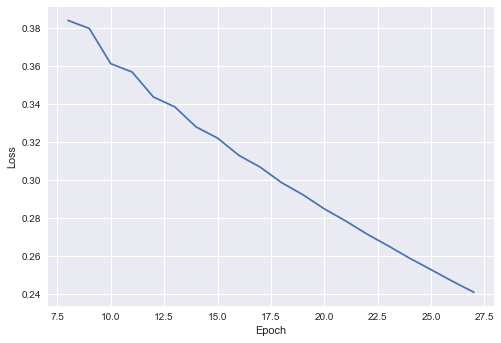

In [18]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [19]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))


Training Accuracy 50.0000


In [20]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)


ModuleNotFoundError: No module named 'visualize'

In [ ]:
from visualize import plot_decision_boundary


In [21]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    


In [25]:
plot_decision_boundary(lambda x:model.predict(X),X,Y)


ValueError: cannot reshape array of size 1 into shape (491,471)

In [23]:
outputs = model.predict(X)


In [24]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 50.0000
